### Homework

Note: sometimes your answer might not match one of the options exactly. That's fine. Select the option that's closest to your solution.

The goal of this homework is to familiarize you with BentoML and how to build and test an ML production service.
Background

You are a new recruit at ACME corp. Your manager is emailing you about your first assignment.

Email from your manager

Good morning recruit! It's good to have you here! I have an assignment for you. I have a data scientist that's built a credit risk model in a jupyter notebook. I need you to run the notebook and save the model with BentoML and see how big the model is. If it's greater than a certain size, I'm going to have to request additional resources from our infra team. Please let me know how big it is.

Thanks,

Mr McManager

In [1]:
import warnings
warnings.filterwarnings("ignore")

### Question 1

- Install BentoML
- What's the version of BentoML you installed?
- Use --version to find out

In [2]:
pip install bentoml -q

Note: you may need to restart the kernel to use updated packages.


In [3]:
import bentoml

In [4]:
bentoml.__version__

'1.0.7'

In [5]:
print(bentoml.__version__)

1.0.7


OR

*In your prompt/terminal, go to the environment bentoml was installed in and <strong>type bentoml --version</strong> to get the version*

### Question 2

Run the notebook which contains the xgboost model from module 6 i.e previous module and save the xgboost model with BentoML. To make it easier for you we have prepared this notebook.

How big approximately is the saved BentoML model? Size can slightly vary depending on your local development environment. Choose the size closest to your model.

- 924kb
- 724kb
- **114kb**
- 8kb

In [6]:
# train.ipynb file was run completely, then following command was run

In [7]:
!bentoml models list

 Tag                          Module           Size        Creation Time       
 credit_risk_model:nk65rt2vâ€¦  bentoml.xgboost  116.30 KiB  2022-10-26 23:54:23 


***The saved model is 116.30KiB. 114kb is the option that is closest to it.***

Another email from your manager

Great job recruit! Looks like I won't be having to go back to the procurement team. Thanks for the information.

However, I just got word from one of the teams that's using one of our ML services and they're saying our service is "broken" and their trying to blame our model. I looked at the data their sending and it's completely bogus. I don't want them to send bad data to us and blame us for our models. Could you write a pydantic schema for the data that they should be sending? That way next time it will tell them it's their data that's bad and not our model.

Thanks,

Mr McManager

### Question 3

Say you have the following data that you're sending to your service:

{
  "name": "Tim",
  "age": 37,
  "country": "US",
  "rating": 3.14
}

What would the pydantic class look like? You can name the class UserProfile.


In [8]:
!pip install pydantic -q

In [9]:
from pydantic import BaseModel


class UserProfile(BaseModel):
    name: str
    age: int
    country: str
    rating: float

Email from your CEO

Good morning! I hear you're the one to go to if I need something done well! We've got a new model that a big client needs deployed ASAP. I need you to build a service with it and test it against the old model and make sure that it performs better, otherwise we're going to lose this client. All our hopes are with you!

Thanks,

CEO of Acme Corp

### Question 4

We've prepared a model for you that you can import using:

curl -O https://s3.us-west-2.amazonaws.com/bentoml.com/mlzoomcamp/coolmodel.bentomodel

bentoml models import coolmodel.bentomodel

What version of scikit-learn was this model trained with?

- **1.1.1**
- 1.1.2
- 1.1.3
- 1.1.4
- 1.1.5

In [10]:
!curl -O https://s3.us-west-2.amazonaws.com/bentoml.com/mlzoomcamp/coolmodel.bentomodel

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  1724  100  1724    0     0   1436      0  0:00:01  0:00:01 --:--:--  1439


In [11]:
!bentoml models import coolmodel.bentomodel

Model(tag="mlzoomcamp_homework:qtzdz3slg6mwwdu5") imported


In [12]:
!bentoml models get mlzoomcamp_homework:qtzdz3slg6mwwdu5

name: mlzoomcamp_homework                                                      
version: qtzdz3slg6mwwdu5                                                      
module: bentoml.sklearn                                                        
labels: {}                                                                     
options: {}                                                                    
metadata: {}                                                                   
context:                                                                       
  framework_name: sklearn                                                      
  framework_versions:                                                          
    scikit-learn: 1.1.1                                                        
  bentoml_version: 1.0.7                                                       
  python_version: 3.9.12                                                       
signatures:                             

### Question 5

Create a bento out of this scikit-learn model. The output type for this endpoint should be NumpyNdarray()

Send this array to the Bento:

[[6.4,3.5,4.5,1.2]]

You can use curl or the Swagger UI. What value does it return?

- 0
- **1**
- 2
- 3

(Make sure your environment has Scikit-Learn installed)

In [13]:
%%writefile service.py

import bentoml
import numpy as np
from bentoml.io import JSON, NumpyNdarray

tag = "mlzoomcamp_homework:qtzdz3slg6mwwdu5"  # Bentoml sklearn model's tag

model_ref = bentoml.sklearn.get(tag)  # Reference object to Bentoml sklearn model

model_runner = model_ref.to_runner() # Run the Bentoml sklearn model using the reference object

svc = bentoml.Service("classifier", runners=[model_runner]) # Create service to run the Bentoml sklearn model 


@svc.api(input=NumpyNdarray(), output=NumpyNdarray())
def classify(input_series: np.ndarray) -> np.ndarray:
    result = model_runner.predict.run(input_series)
    return result  


Overwriting service.py


In [14]:
!bentoml serve service.py:svc --reload
# After running this command, open http://localhost:3000/ and under service APIs category, click on
# POST button (/classify InferenceAPI(NumpyNdarray → NumpyNdarray)) and  click on "Try it out" buttong
# Test if the API is working by copying # [[6.4,3.5,4.5,1.2]] after clearing everything the request body section. 
# Click on execute.

# You should get code 200 as a response and value 1 in the response body


# To stop the service, 
## click on kernel>interrupt 
## or 
## Tap on I key a couple of times when in command mode(press Esc key to get to the command mode)
## or
## Press CTRL+C to quit

^C


### Question 6

Ensure to serve your bento with --production for this question

Install locust using:

pip install locust

Use the following locust file: [locustfile.py](https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/cohorts/2022/07-bento-production/locustfile.py)

Ensure that it is pointed at your bento's endpoint (In case you didn't name your endpoint "classify")

Configure 100 users with ramp time of 10 users per second. Click "Start Swarming" and ensure that it is working.

Now download a second model with this command:

curl -O https://s3.us-west-2.amazonaws.com/bentoml.com/mlzoomcamp/coolmodel2.bentomodel

Or you can download with this link as well: https://s3.us-west-2.amazonaws.com/bentoml.com/mlzoomcamp/coolmodel2.bentomodel

Now import the model:

bentoml models import coolmodel2.bentomodel

In [15]:
!pip install locust -q

In [16]:
%%writefile locustfile.py

from locust import task
from locust import between
from locust import HttpUser

sample = [[6.4,3.5,4.5,1.2]]

class MLZoomUser(HttpUser):
    """
    Usage:
        Start locust load testing client with:
            locust -H http://localhost:3000
        Open browser at http://localhost:8089, adjust desired number of users and spawn
        rate for the load test from the Web UI and start swarming.
    """

    @task
    def classify(self):
        self.client.post("/classify", json=sample)

    wait_time = between(0.01, 2)

Overwriting locustfile.py


In [17]:
!locust -H http://localhost:3000

[2022-10-26 23:55:48,405] Zatoichi/INFO/locust.main: Starting web interface at http://0.0.0.0:8089 (accepting connections from all network interfaces)
[2022-10-26 23:55:48,418] Zatoichi/INFO/locust.main: Starting Locust 2.12.2
Traceback (most recent call last):
  File "src\\gevent\\greenlet.py", line 908, in gevent._gevent_cgreenlet.Greenlet.run
  File "C:\anaconda3\envs\ml-zoomcamp\lib\site-packages\locust\web.py", line 473, in start_server
    self.server.serve_forever()
  File "C:\anaconda3\envs\ml-zoomcamp\lib\site-packages\gevent\baseserver.py", line 398, in serve_forever
    self.start()
  File "C:\anaconda3\envs\ml-zoomcamp\lib\site-packages\gevent\baseserver.py", line 336, in start
    self.init_socket()
  File "C:\anaconda3\envs\ml-zoomcamp\lib\site-packages\gevent\pywsgi.py", line 1545, in init_socket
    StreamServer.init_socket(self)
  File "C:\anaconda3\envs\ml-zoomcamp\lib\site-packages\gevent\server.py", line 180, in init_socket
    self.socket = self.get_listener(self.a

In [18]:
!curl -O https://s3.us-west-2.amazonaws.com/bentoml.com/mlzoomcamp/coolmodel2.bentomodel

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0  1728    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100  1728  100  1728    0     0   1412      0  0:00:01  0:00:01 --:--:--  1414


In [19]:
!bentoml models import coolmodel2.bentomodel

Model(tag="mlzoomcamp_homework:jsi67fslz6txydu5") imported


In [20]:
!bentoml models list

 Tag                          Module           Size        Creation Time       
 credit_risk_model:nk65rt2vâ€¦  bentoml.xgboost  116.30 KiB  2022-10-26 23:54:23 
 mlzoomcamp_homework:jsi67fâ€¦  bentoml.sklearn  5.82 KiB    2022-10-14 20:18:43 
 mlzoomcamp_homework:qtzdz3â€¦  bentoml.sklearn  5.79 KiB    2022-10-14 02:12:14 


In [21]:
## Service_COOLMODEL.py

In [22]:
%%writefile service_coolmodel.py

import bentoml
import numpy as np
from bentoml.io import JSON, NumpyNdarray

tag = "mlzoomcamp_homework:qtzdz3slg6mwwdu5"  # Bentoml sklearn model's tag

model_ref = bentoml.sklearn.get(tag)  # Reference object to Bentoml sklearn model

model_runner = model_ref.to_runner() # Run the Bentoml sklearn model using the reference object

svc = bentoml.Service("classifier", runners=[model_runner]) # Create service to run the Bentoml sklearn model 


@svc.api(input=NumpyNdarray(), output=NumpyNdarray())
def classify(input_series: np.ndarray) -> np.ndarray:
    result = model_runner.predict.run(input_series)
    return result  

Overwriting service_coolmodel.py


In [23]:
!bentoml serve service_coolmodel2.py:svc --reload --production

^C


In [25]:
## Service_COOLMODEL2.py


In [26]:
%%writefile service_coolmodel2.py

import bentoml
import numpy as np
from bentoml.io import JSON, NumpyNdarray

tag = "mlzoomcamp_homework:jsi67fslz6txydu5"  # Bentoml sklearn model's tag

model_ref = bentoml.sklearn.get(tag)  # Reference object to Bentoml sklearn model

model_runner = model_ref.to_runner() # Run the Bentoml sklearn model using the reference object

svc = bentoml.Service("classifier", runners=[model_runner]) # Create service to run the Bentoml sklearn model 


@svc.api(input=NumpyNdarray(), output=NumpyNdarray())
def classify(input_series: np.ndarray) -> np.ndarray:
    result = model_runner.predict.run(input_series)
    return result  

Overwriting service_coolmodel2.py


In [27]:
!bentoml serve service_coolmodel2.py:svc --reload --production

^C


Update your bento's runner tag and test with both models. Which model allows more traffic (more throughput) as you ramp up the traffic?

Hint 1: Remember to turn off and turn on your bento service between changing the model tag. Use Ctl-C to close the service in between trials.

Hint 2: Increase the number of concurrent users to see which one has higher throughput

Which model has better performance at higher volumes?

- **The first model**
- The second model

### Comparing the throughput details of both the models

In [28]:
import matplotlib.pyplot as plt

#### Coolmodel or Model1

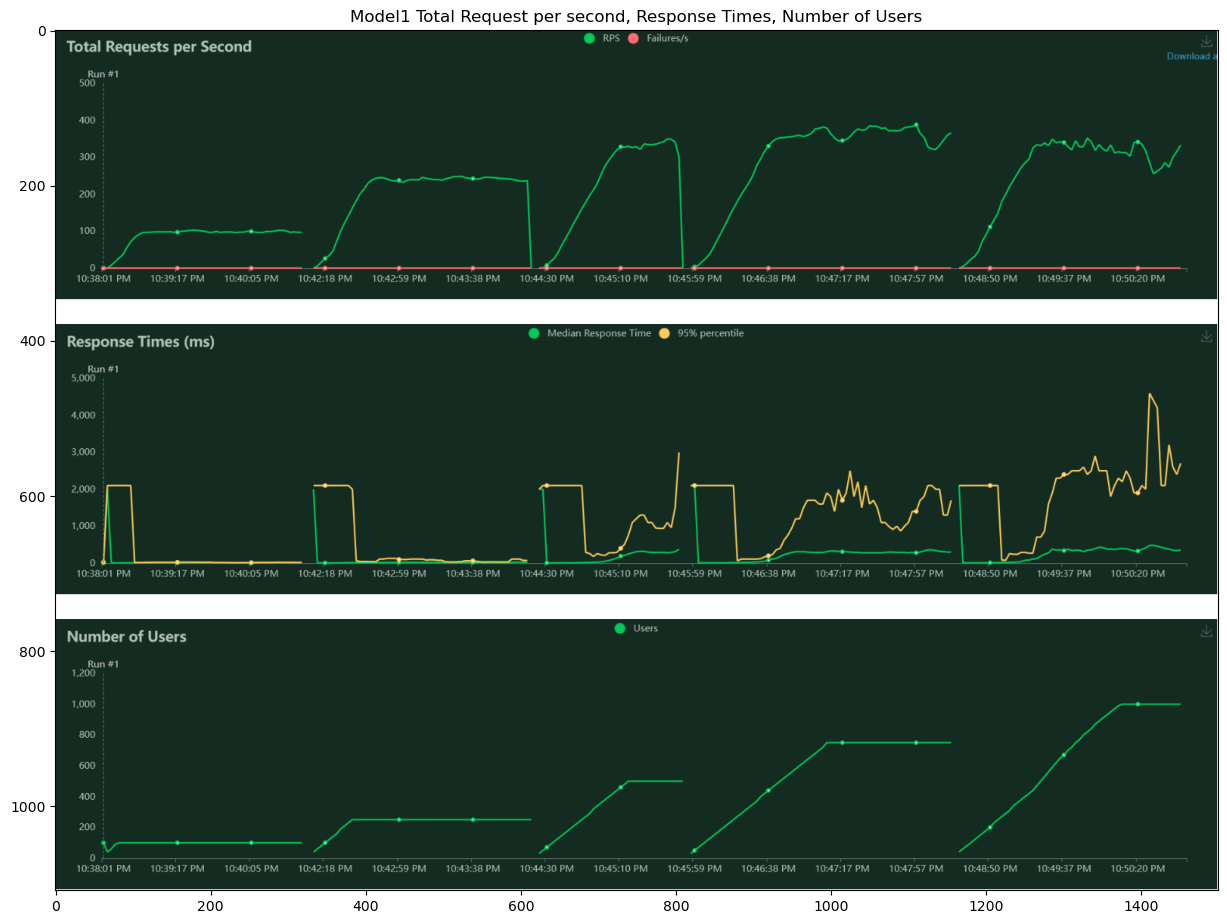

In [29]:
model1_tp_details = plt.imread("coolmodel - Throughput Details.png",format="png")

plt.figure(figsize=(15,15))
plt.title("Model1 Total Request per second, Response Times, Number of Users")

plt.imshow(model1_tp_details)
plt.show()

#### Coolmodel2 or Model2

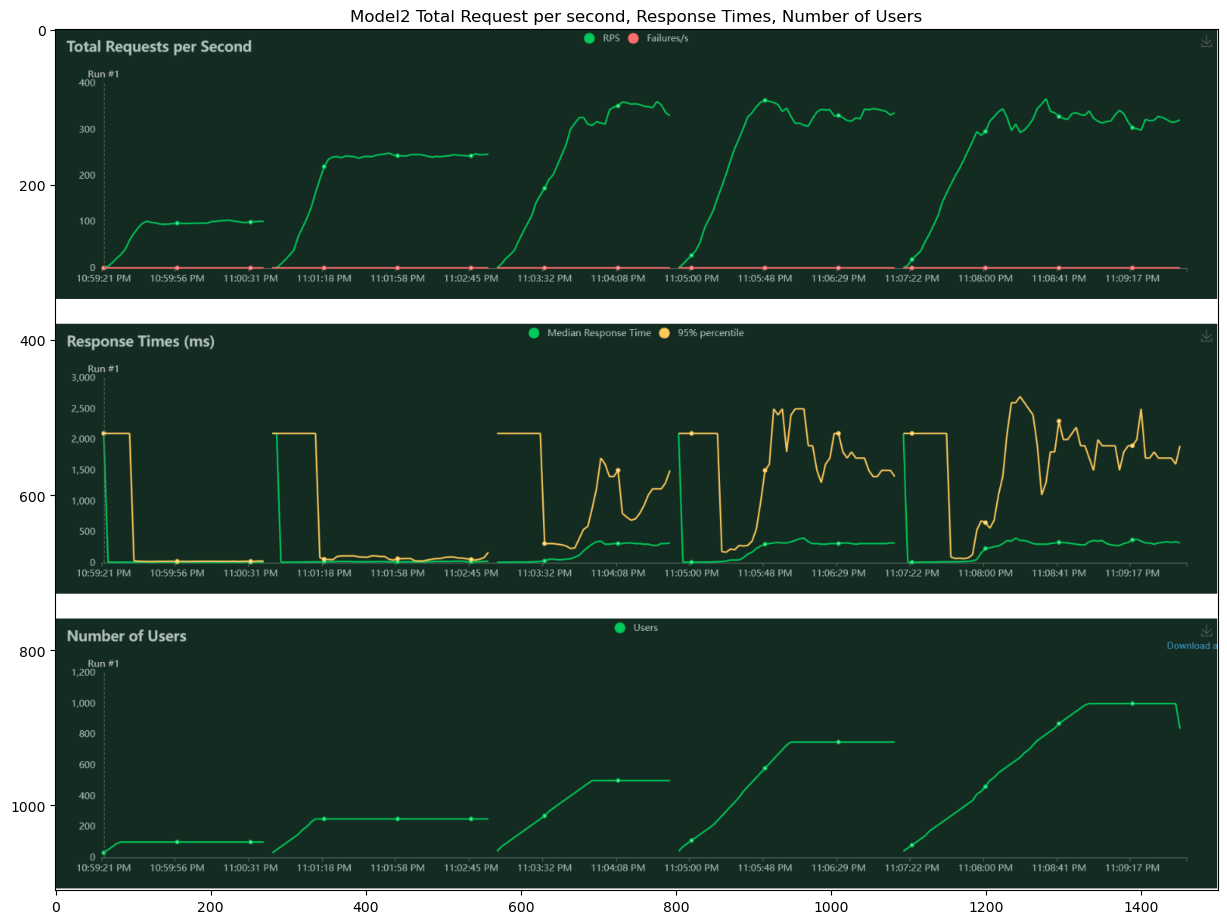

In [30]:
model2_tp_details = plt.imread("coolmodel2 - Throughput Details.png",format="png")

plt.figure(figsize=(15,15))
plt.title("Model2 Total Request per second, Response Times, Number of Users")

plt.imshow(model2_tp_details)
plt.show()

**At high no. of concurrent users, Model2, performs better in terms of Total Requests per Second as well as Median and 95% response times** 

Email from marketing

Hello ML person! I hope this email finds you well. I've heard there's this cool new ML model called Stable Diffusion. I hear if you give it a description of a picture it will generate an image. We need a new company logo and I want it to be fierce but also cool, think you could help out?

Thanks,

Mike Marketer

Question 7 (optional)

Go to this Bento deployment of Stable Diffusion: http://54.176.205.174/ (or deploy it yourself)

Use the txt2image endpoint and update the prompt to: "A cartoon dragon with sunglasses". Don't change the seed, it should be 0 by default

What is the resulting image?
 